<a href="https://colab.research.google.com/github/Eugene-prog22/Learning/blob/main/%D1%86%D0%B2%D0%B5%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive # Интеграция с гугл-диском
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [ ]:
def draw_corr_matrix(df: pd.DataFrame, shape: int): # df-ваш датафрейм, shape - размер матрицы
    df = df.corr().copy()
    plt.rcParams["figure.figsize"] = shape,shape
    plt.imshow(df, cmap ='viridis')


    plt.colorbar()

    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            text = plt.text(j, i, round(float(df.iloc[i, j]),2),
                        ha="center", va="center", color="r")

    plt.xticks(range(len(df)), df.columns, rotation = 45)


    plt.yticks(range(len(df)), df.index)

    plt.show()

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/files/dataset/Iris_dataset.csv')

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,NaN,1.3,NaN,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  145 non-null    float64
 1   sepal_width   146 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   146 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.isnull().sum() #пропущенные данные нельзя передавать в МЛ

,0
sepal_length,5
sepal_width,4
petal_length,3
petal_width,4
species,0


In [ ]:
data.sepal_length.replace(np.nan, data.sepal_length.mean(), inplace = True)

data.sepal_width.replace(np.nan, data.sepal_width.mean(), inplace = True)

data.petal_length.replace(np.nan, data.petal_length.mean(), inplace = True)

data.petal_width.replace(np.nan, data.petal_width.mean(), inplace = True)

In [ ]:
data.isnull().sum() #пропущенные данные нельзя передавать в МЛ

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
data.species.value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
data.species.replace('Iris-versicolor', 0 , inplace = True)

data.species.replace('Iris-virginica', 1 , inplace = True)

data.species.replace('Iris-setosa', 2 , inplace = True)

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.500000,1.4,0.20000,2
1,4.9,3.000000,1.4,0.20000,2
2,4.7,3.055479,1.3,1.20274,2
3,4.6,3.100000,1.5,0.20000,2
4,5.0,3.600000,1.4,0.20000,2
...,...,...,...,...,...
145,6.7,3.000000,5.2,2.30000,1
146,6.3,2.500000,5.0,1.90000,1
147,6.5,3.000000,5.2,2.00000,1
148,6.2,3.400000,5.4,2.30000,1


In [ ]:
data = data.sample(frac = 1, random_state = 10 ).reset_index(drop = True)

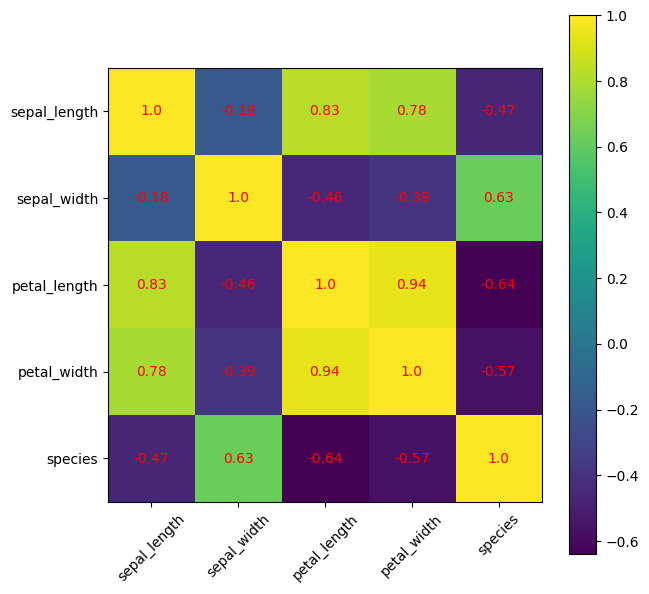

In [ ]:
draw_corr_matrix(data, 7)

In [ ]:
x = data.drop(columns = ['species'])

In [ ]:
y = data['species']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=10)

Логистическая регрессия

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
lr = LogisticRegression(random_state=10)

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=10)

In [ ]:
y_test_predictions = lr.predict(x_test)

In [ ]:
y_test_predictions

array([0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 1,
       0, 0, 2, 2, 1, 0, 0, 0])

In [ ]:
metrics.accuracy_score(y_test, y_test_predictions)*100

93.33333333333333

Решающее дерево

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
y_test_predictions_dt=dt.predict(x_test)

In [ ]:
y_test_predictions_dt

array([0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 1,
       0, 0, 2, 2, 1, 0, 0, 0])

In [ ]:
metrics.accuracy_score(y_test, y_test_predictions_dt)*100

96.66666666666667

Рандомный лес

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=10,
                             n_jobs=-1)
rf.fit(x_train,y_train)
y_test_predictions_rf=rf.predict(x_test)

In [ ]:
y_test_predictions_rf

array([0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 1,
       0, 0, 2, 2, 1, 0, 0, 0])

In [ ]:
metrics.accuracy_score(y_test, y_test_predictions_rf)*100

93.33333333333333